In [11]:
import pandas as pd
import benchmax.evaluation as ev
import matplotlib.pyplot as plt
import tikzplotlib


In [12]:
def get_data(solvers):
    param = {}
    for solver in solvers:
        param["stats_smtrat_15m_6Gi_"+solver+".xml"] = {"smtrat-static": solver, "smtrat-"+solver: solver}
    return ev.xmls_to_pandas(param, [])

df = get_data(["MCSATNL","MCSATOCNNASC","MCSATOCLWH11","MCSATOCLWH12","MCSATOCLWH13","MCSATFMICPVSNL","MCSATFMICPVSOCNNASC","MCSATFMICPVSOCLWH11","MCSATFMICPVSOCLWH12","MCSATFMICPVSOCLWH13"])
df = df.join(ev.virtual_best(df, ["MCSATOCLWH11","MCSATOCLWH12","MCSATOCLWH13"], "VB-LW"))
df = df.join(ev.virtual_best(df, ["MCSATFMICPVSOCLWH11","MCSATFMICPVSOCLWH12","MCSATFMICPVSOCLWH13"], "VB-LW+"))
df = df.join(ev.virtual_best(df, ["MCSATOCLWH11","MCSATOCLWH12","MCSATOCLWH13","MCSATOCNNASC"], "VB"))
df = df.join(ev.virtual_best(df, ["MCSATFMICPVSOCLWH11","MCSATFMICPVSOCLWH12","MCSATFMICPVSOCLWH13","MCSATFMICPVSOCNNASC"], "VB+"))
df

MCSATNL         MCSATOCNNASC          \
                                     answer runtime       answer runtime   
20161105-Sturm-MBO/mbo_E1.smt2       memout   905.0       memout   905.0   
20161105-Sturm-MBO/mbo_E10.smt2     timeout   910.0      timeout   910.0   
20161105-Sturm-MBO/mbo_E10E11.smt2   memout   905.0       memout   905.0   
20161105-Sturm-MBO/mbo_E10E12.smt2   memout   905.0       memout   905.0   
20161105-Sturm-MBO/mbo_E10E13.smt2   memout   905.0       memout   905.0   
...                                     ...     ...          ...     ...   
zankl/matrix-5-all-5.smt2           timeout   910.0      timeout   910.0   
zankl/matrix-5-all-6.smt2           timeout   910.0      timeout   910.0   
zankl/matrix-5-all-7.smt2           timeout   910.0      timeout   910.0   
zankl/matrix-5-all-8.smt2           timeout   910.0      timeout   910.0   
zankl/matrix-5-all-9.smt2           timeout   910.0      timeout   910.0   

                                   MCSATOCLWH11         MCSATOCLWH12          \
                                         answer runtime       answer runtime   
20161105-Sturm-MBO/mbo_E1.smt2           memout   905.0       memout   905.0   
20161105-Sturm-MBO/mbo_E10.smt2         timeout   910.0      timeout   910.0   
20161105-Sturm-MBO/mbo_E10E11.smt2       memout   905.0       memout   905.0   
20161105-Sturm-MBO/mbo_E10E12.smt2       memout   905.0       memout   905.0   
20161105-Sturm-MBO/mbo_E10E13.smt2       memout   905.0       memout   905.0   
...                                         ...     ...          ...     ...   
zankl/matrix-5-all-5.smt2               timeout   910.0      timeout   910.0   
zankl/matrix-5-all-6.smt2               timeout   910.0      timeout   910.0   
zankl/matrix-5-all-7.smt2               timeout   910.0      timeout   910.0   
zankl/matrix-5-all-8.smt2               timeout   910.0      timeout   910.0   
zankl/matrix-5-all-9.smt2               timeout   910.0      timeout   910.0   

                                   MCSATOCLWH13          ...  \
                                         answer runtime  ...   
20161105-Sturm-MBO/mbo_E1.smt2           memout   905.0  ...   
20161105-Sturm-MBO/mbo_E10.smt2         timeout   910.0  ...   
20161105-Sturm-MBO/mbo_E10E11.smt2       memout   905.0  ...   
20161105-Sturm-MBO/mbo_E10E12.smt2       memout   905.0  ...   
20161105-Sturm-MBO/mbo_E10E13.smt2       memout   905.0  ...   
...                                         ...     ...  ...   
zankl/matrix-5-all-5.smt2               timeout   910.0  ...   
zankl/matrix-5-all-6.smt2               timeout   910.0  ...   
zankl/matrix-5-all-7.smt2               timeout   910.0  ...   
zankl/matrix-5-all-8.smt2               timeout   910.0  ...   
zankl/matrix-5-all-9.smt2               timeout   910.0  ...   

                                   MCSATFMICPVSOCLWH13             VB-LW  \
                                                answer  runtime   answer   
20161105-Sturm-MBO/mbo_E1.smt2                   unsat    1.934   memout   
20161105-Sturm-MBO/mbo_E10.smt2                  unsat    0.135  timeout   
20161105-Sturm-MBO/mbo_E10E11.smt2               unsat    1.048   memout   
20161105-Sturm-MBO/mbo_E10E12.smt2               unsat   48.390   memout   
20161105-Sturm-MBO/mbo_E10E13.smt2               unsat    8.729   memout   
...                                                ...      ...      ...   
zankl/matrix-5-all-5.smt2                      timeout  910.000  timeout   
zankl/matrix-5-all-6.smt2                      timeout  910.000  timeout   
zankl/matrix-5-all-7.smt2                      timeout  910.000  timeout   
zankl/matrix-5-all-8.smt2                      timeout  910.000  timeout   
zankl/matrix-5-all-9.smt2                      timeout  910.000  timeout   

                                             VB-LW+                VB          \
                                   runtime   answer  runtime   answer runtime   
20161105-Sturm-MBO/mbo

Text(0, 0.5, 'running time (s)')

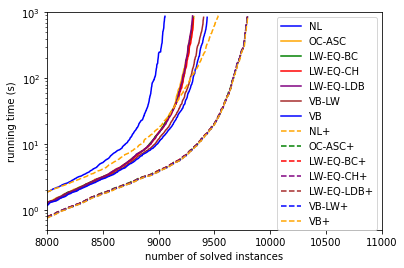

In [13]:
plt.figsize=[20,8]
ax = ev.performance_profile(df,["MCSATNL","MCSATOCNNASC","MCSATOCLWH11","MCSATOCLWH12","MCSATOCLWH13","VB-LW","VB","MCSATFMICPVSNL","MCSATFMICPVSOCNNASC","MCSATFMICPVSOCLWH11","MCSATFMICPVSOCLWH12","MCSATFMICPVSOCLWH13","VB-LW+","VB+"])
ax.set_xlim(left=8000, right=11000)
ax.set_ylim(bottom=0.5,top=1000)

plt.yscale('log', base=10)

for i in range(7,14):
    ax.lines[i].set_linestyle('dashed')
colors = ['blue','orange','green','red','purple','brown','yellow']
for i in range(0,14):
    ax.lines[i].set_color(colors[i % 6])
ax.legend(["NL","OC-ASC","LW-EQ-BC","LW-EQ-CH","LW-EQ-LDB","VB-LW","VB","NL+","OC-ASC+","LW-EQ-BC+","LW-EQ-CH+","LW-EQ-LDB+","VB-LW+","VB+"])
ax.set_ylabel("running time (s)")

#tikzplotlib.save("../plots/performance_profile.tex")

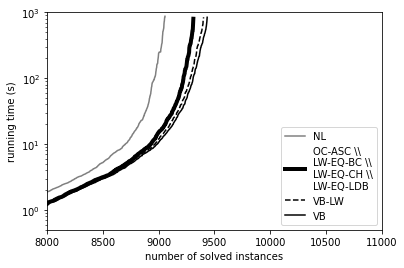

In [19]:
plt.figsize=[20,8]
ax = ev.performance_profile(df,["MCSATNL","MCSATOCLWH12","VB-LW","VB"])
ax.set_xlim(left=8000, right=11000)
ax.set_ylim(bottom=0.5,top=1000)

plt.yscale('log', base=10)

ax.lines[0].set_color('gray')
ax.lines[1].set_color('black')
ax.lines[2].set_color('black')
ax.lines[3].set_color('black')
ax.lines[1].set_linewidth(4)
ax.lines[2].set_linestyle('dashed')


ax.legend(["NL","OC-ASC \\\\\nLW-EQ-BC \\\\\nLW-EQ-CH \\\\\nLW-EQ-LDB","VB-LW","VB"],loc='lower right')
ax.set_ylabel("running time (s)")

#tikzplotlib.save("../plots/performance_profile.tex")

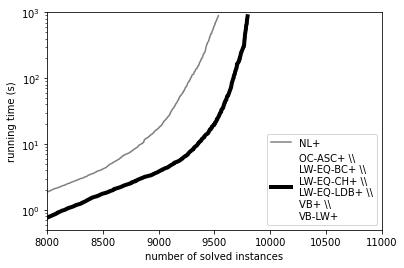

In [20]:
plt.figsize=[20,8]
ax = ev.performance_profile(df,["MCSATFMICPVSNL","VB-LW+"])
ax.set_xlim(left=8000, right=11000)
ax.set_ylim(bottom=0.5,top=1000)

plt.yscale('log', base=10)

ax.lines[0].set_color('gray')
ax.lines[1].set_color('black')
ax.lines[1].set_linewidth(4)

ax.legend(["NL+","OC-ASC+ \\\\\nLW-EQ-BC+ \\\\\nLW-EQ-CH+ \\\\\nLW-EQ-LDB+ \\\\\nVB-LW+ \\\\\nVB+"],loc='lower right')
ax.set_ylabel("running time (s)")

#tikzplotlib.save("../plots/performance_profile_plus.tex")